# REGULARIZED LINEAR REGRESSION PROJECT

In [1]:
import pandas as pd

data_usa = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
data_usa.to_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/raw/DATASET_ORIGINAL.csv", index = False)

data_usa

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                    12.749771  ...         3644                 12.9   
1                    11.564429  ...        14692                 12.0   
2                    12.865239  ...         2373                 19.7   
3                    13.897321  ...         1789                 14.1   
4                    11.901798  ...         4661                 13.5   
...                        ...  ...          ...                  ...   
3135                 15.277229  ...         2098                  8.9   
3136                 17.733200  ...          928                  7.2   
3137                 13.311001  ...         1163                 10.4   
3138                 11.452124  ...          506                 11.3   
3139                 13.004162  ...          480                 11.7   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                      11.9                   13.8             5462   
1                      11.0                   13.1            20520   
2                      18.6                   20.6             3870   
3                      13.2                   14.9             2511   
4                      12.6                   14.5             6017   
...                     ...                    ...              ...   
3135                    8.3                    9.6             2834   
3136                    6.5                    8.0             1360   
3137                    9.5                   11.2             1500   
3138                   10.3                   12.1              686   
3139                   10.7                   12.7              644   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0                3.1               2.9               3.3        1326   
1                3.2               3.0               3.5        5479   
2                4.5               4.2               4.8         887   
3                3.3               3.1               3.6         595   
4                3.4               3.2               3.7        1507   
...              ...               ...               ...         ...   
3135             2.6               2.4               2.8         821   
3136             2.4               2.2               2.

In [2]:
data_usa.shape

(3140, 108)

In [3]:
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
data_usa.drop_duplicates (data_usa.columns.difference(["fips"]))

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                    12.749771  ...         3644                 12.9   
1                    11.564429  ...        14692                 12.0   
2                    12.865239  ...         2373                 19.7   
3                    13.897321  ...         1789                 14.1   
4                    11.901798  ...         4661                 13.5   
...                        ...  ...          ...                  ...   
3135                 15.277229  ...         2098                  8.9   
3136                 17.733200  ...          928                  7.2   
3137                 13.311001  ...         1163                 10.4   
3138                 11.452124  ...          506                 11.3   
3139                 13.004162  ...          480                 11.7   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                      11.9                   13.8             5462   
1                      11.0                   13.1            20520   
2                      18.6                   20.6             3870   
3                      13.2                   14.9             2511   
4                      12.6                   14.5             6017   
...                     ...                    ...              ...   
3135                    8.3                    9.6             2834   
3136                    6.5                    8.0             1360   
3137                    9.5                   11.2             1500   
3138                   10.3                   12.1              686   
3139                   10.7                   12.7              644   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0                3.1               2.9               3.3        1326   
1                3.2               3.0               3.5        5479   
2                4.5               4.2               4.8         887   
3                3.3               3.1               3.6         595   
4                3.4               3.2               3.7        1507   
...              ...               ...               ...         ...   
3135             2.6               2.4               2.8         821   
3136             2.4               2.2               2.

In [5]:
data_usa.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

### Analisis numerico (univariable)

<Axes: xlabel='Obesity_number'>

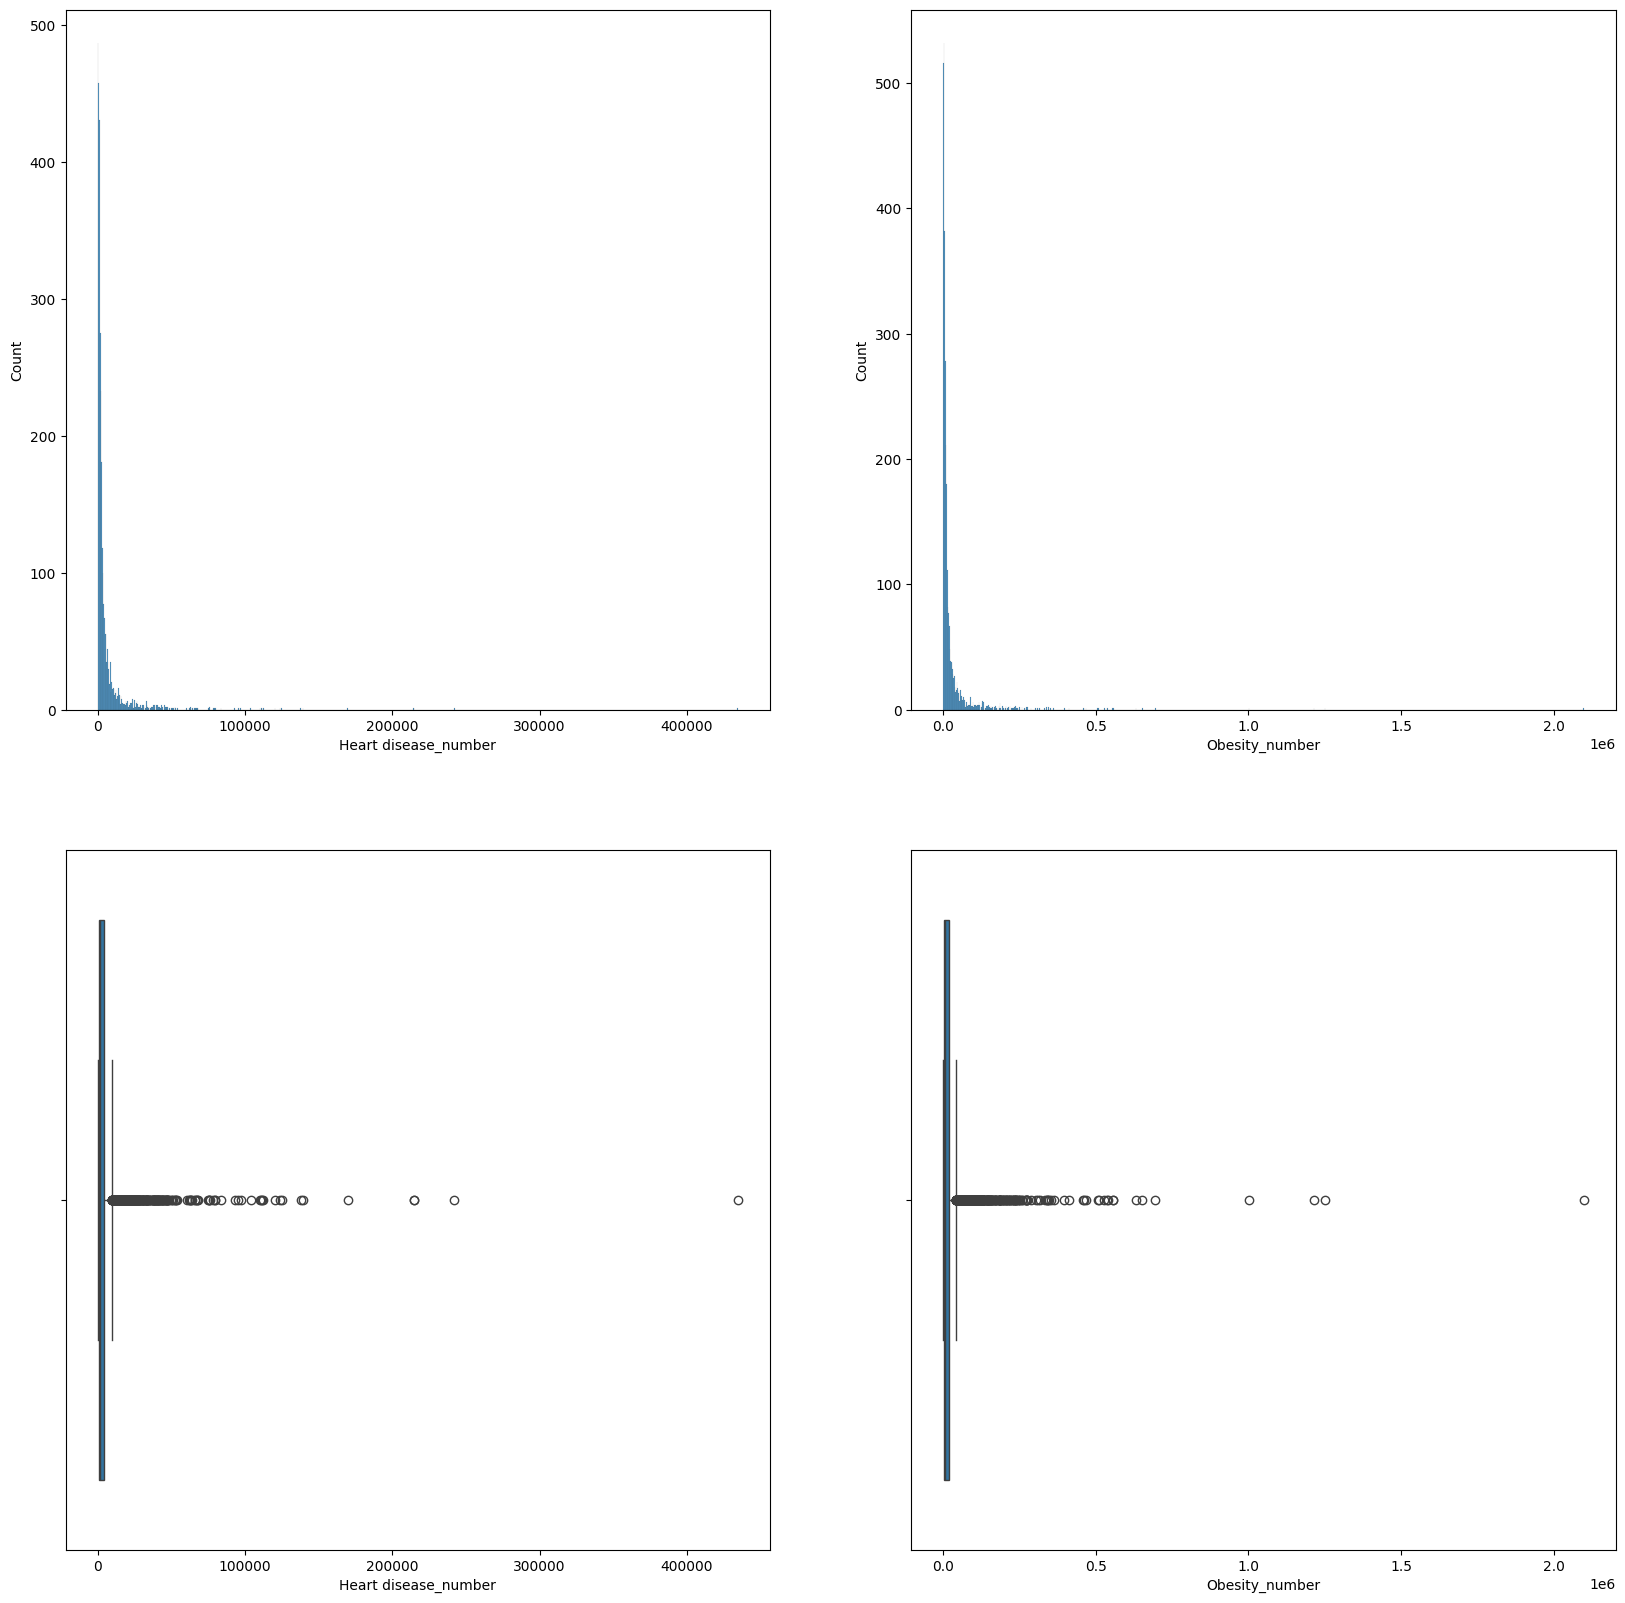

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots (2,2, figsize=(20,20))

sns.histplot (data_usa, x = "Heart disease_number", ax = axis [0,0])
sns.boxplot (data_usa, x = "Heart disease_number", ax = axis[1,0])

sns.histplot (data_usa, x = "Obesity_number", ax = axis [0,1])
sns.boxplot (data_usa, x = "Obesity_number", ax = axis[1,1])


### Analisis multivariable / Numerico-Numerico

<Axes: >

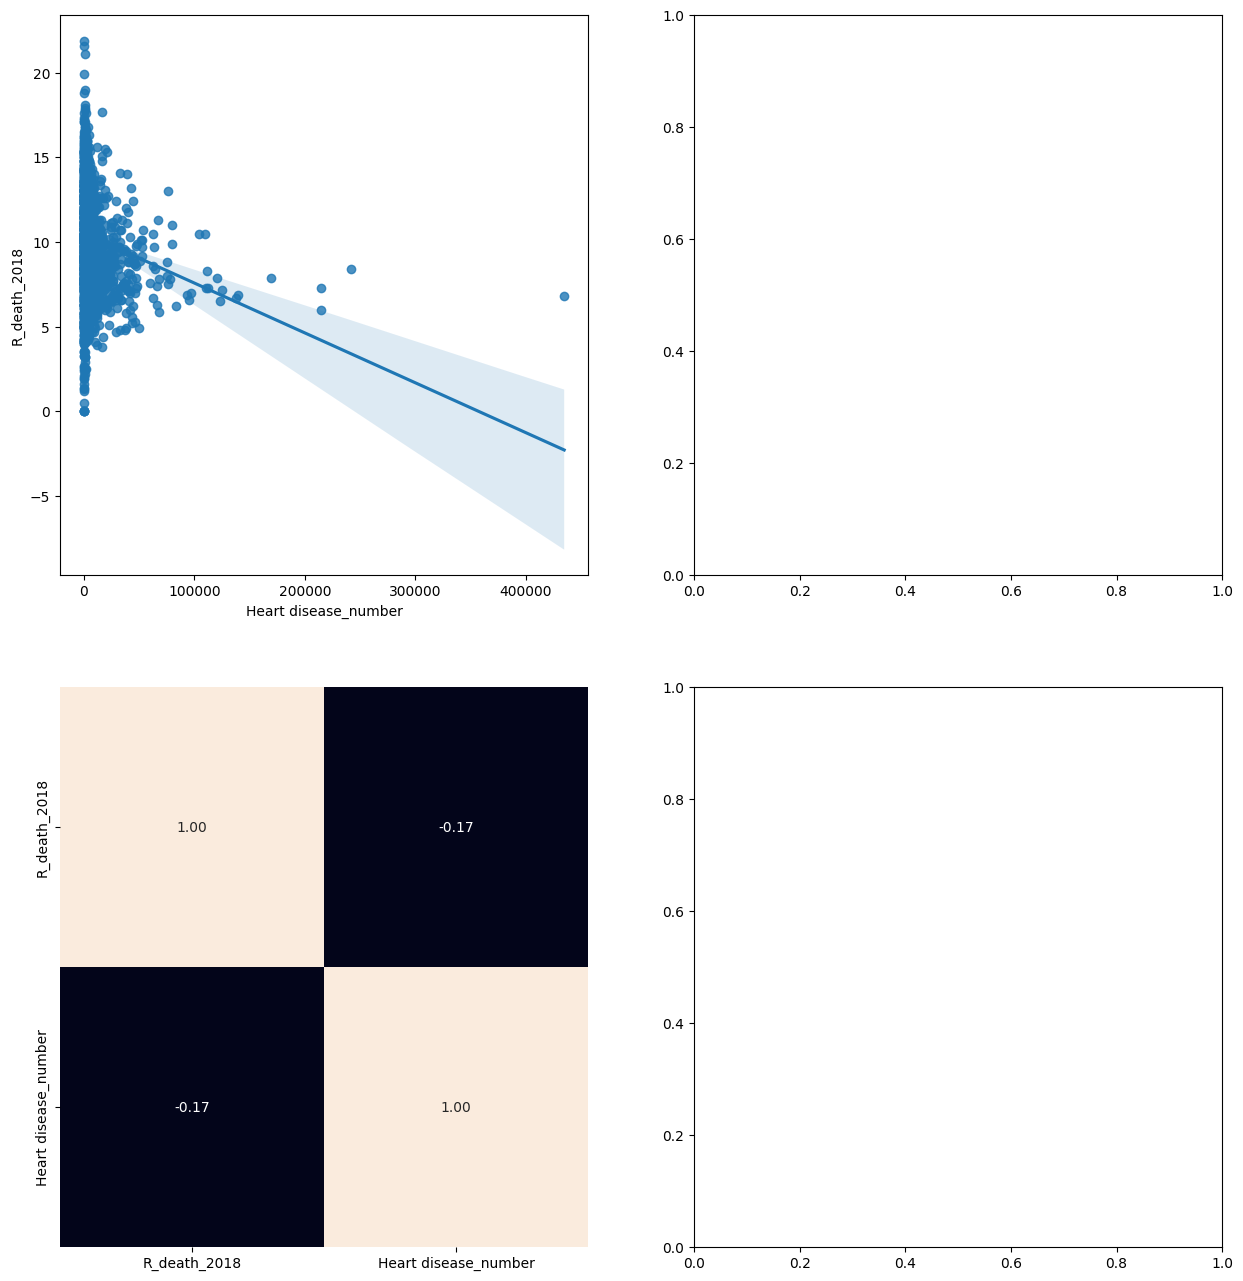

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (15, 16))

sns.regplot (data_usa, x = "Heart disease_number", y = "R_death_2018", ax = axis[0,0])
sns.heatmap (data_usa[["R_death_2018", "Heart disease_number"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

In [8]:
data_usa["COUNTY_NAME_n"] = pd.factorize(data_usa["COUNTY_NAME"])[0]
data_usa["STATE_NAME_n"] = pd.factorize(data_usa["STATE_NAME"])[0]

data_usa_factorize = data_usa.copy()

data_usa_factorize.drop ('COUNTY_NAME', axis=1, inplace=True)
data_usa_factorize.drop ('STATE_NAME', axis=1, inplace=True)

data_usa_factorize.to_csv("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/raw/DATASET_FACTORIZED.csv", index=False)

columns = data_usa_factorize.columns

fig, axis = plt.subplots (figsize= (100,100))

sns.heatmap (data_usa_factorize[columns].corr(), annot = True, fmt = ".2f")

plt.show()


In [9]:
data_usa_factorize.describe().to_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/raw/DATASET_FACTORIZED_DESCRIBE.csv", index=False)

data_usa_factorize.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  ...  \
count               3140.000000  3.140000e+03               3140.000000  ...   
mean                  12.283979  1.391649e+04                 11.751535  ...   
std                    3.126297  4.899095e+04                  1.696599  ...   
min                    0.000000  1.100000e+01                  6.092789  ...   
25%                   10.496774  1.232750e+03                 10.689322  ...   
50%                   11.772649  3.000500e+03                 11.580861  ...   
75%                   13.182260  8.314250e+03                 12.639379  ...   
max                   37.570198  1.501844e+06                 22.225129  ...   

       diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
count            3140.000000            3140.000000      3140.000000   
mean               12.088089              14.053726      9326.577707   
std                 2.622948               2.824828     29754.601185   
min                 5.500000               6.700000        11.000000   
25%                10.300000              12.100000      1187.750000   
50%                11.800000              13.800000      2743.000000   
75%                13.700000              15.900000      6679.250000   
max                24.200000              27.000000    952335.000000   

       CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI     CKD_number  \
count     3140.000000       3140.000000       3140.000000    3140.000000   
mean         3.446242          3.207516          3.710478    2466.234076   
std          0.568059          0.527740          0.613069    7730.422067   
min          1.800000          1.700000          1.900000       3.000000   
25%          3.100000          2.900000          3.300000     314.750000   
50%          3.400000          3.200000          3.700000     718.000000   
75%          3.800000          3.500000          4.100000    1776.250000   
max          6.200000          5.800000          6.600000  237766.000000   

       Urban_rural_code  COUNTY_NAME_n  STATE_NAME_n  
count       3140.000000    3140.000000   3140.000000  
mean           4.635350     688.478981     26.253503  
std            1.510447     541.767733     14.260381  
min            1.000000       0.000000      0.000000  
25%            3.000000     182.000000     14.000000  
50%            5.000000     564.000000     25.000000  
75%            6.000000    1129.250000     40.000000  
max            6.000000    1840.000000     50.000000  

[8 rows x 108 columns]

In [10]:
data_usa_factorize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_n
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


### Dividimos los datos en Train y Test

In [11]:
from sklearn.model_selection import train_test_split

predictoras = data_usa_factorize.drop (["Heart disease_number"], axis = 1)
target = data_usa_factorize ["Heart disease_number"]

x_train, x_test, y_train, y_test = train_test_split (predictoras, target, test_size = 0.3, random_state = 7)

data_usa_factorize_train = pd.concat ([x_train, y_train], axis = 1)
data_usa_factorize_train.to_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/raw/DATASET_FACTORIZED_TRAIN.csv")

data_usa_factorize_test = pd.concat ([x_test, y_test], axis = 1)
data_usa_factorize_test.to_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/raw/DATASET_FACTORIZED_TEST.csv")

x_train.head()


fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
2252  42021   131730  13324               10.114628   15735   
1057  21133    21899   2627               11.995982    2530   
511   13257    26035   3105               11.926253    3488   
1315  27007    46847   6825               14.568702    6772   
1729  31155    21303   2761               12.960616    2872   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
2252                 11.944887  15356                 11.657178  13456   
1057                 11.553039   2298                 10.493630   2593   
511                  13.397350   3535                 13.577876   2734   
1315                 14.455568   7502                 16.013832   5588   
1729                 13.481669   2171                 10.191053   2504   

      30-39 y/o % of total pop  ...  diabetes_Lower 95% CI  \
2252                 10.214833  ...                   11.6   
1057                 11.840723  ...                   17.2   
511                  10.501248  ...                   12.3   
1315                 11.928192  ...                   10.0   
1729                 11.754213  ...                    9.2   

      diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
2252                   13.8            13586             3.4   
1057                   20.1             3203             4.3   
511                    14.4             2697             3.5   
1315                   11.6             3799             3.2   
1729                   11.1             1643             2.8   

      CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  Urban_rural_code  \
2252               3.2               3.7        3627                 4   
1057               3.9               4.7         731                 6   
511                3.2               3.7         700                 5   
1315               3.0               3.4        1123                 5   
1729               2.6               3.1         458                 3   

      COUNTY_NAME_n  STATE_NAME_n  
2252           1380            38  
1057            725            17  
511             421            10  
1315            896            23  
1729           1100            27  

[5 rows x 107 columns]

In [12]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit (x_train)

x_train_norm = scaler.transform (x_train)
x_train_norm = pd.DataFrame (x_train_norm, index = x_train.index, columns = predictoras.columns)

x_test_norm = scaler.transform (x_test)
x_test_norm = pd.DataFrame (x_test_norm, index = x_test.index, columns = predictoras.columns)

data_usa_factorize_train_norm = pd.concat ([x_train_norm, y_train], axis = 1)
data_usa_factorize_test_norm = pd.concat ([x_test_norm, y_test], axis =1)

dump (scaler, open ("/workspaces/Regularized_Linear_Regression_LeryBenavides/models/normalizer.sav", "wb"))

data_usa_factorize_train_norm.head()

fips   TOT_POP       0-9  0-9 y/o % of total pop    19-Oct  \
2252  0.771767  0.064487  0.000849               -0.855059  0.039913   
1057 -0.605128 -0.235380 -0.231722                0.045949 -0.244932   
511  -1.124298 -0.224087 -0.221329                0.012555 -0.224267   
1315 -0.217925 -0.167265 -0.140450                1.278063 -0.153428   
1729  0.055502 -0.237007 -0.228809                0.507926 -0.237554   

      10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39  \
2252                 -0.429739  0.005284                 -0.208817 -0.019403   
1057                 -0.654368 -0.233950                 -0.578625 -0.221003   
511                   0.402894 -0.211287                  0.401633 -0.218386   
1315                  1.009524 -0.138608                  1.175847 -0.165421   
1729                  0.451231 -0.236277                 -0.674792 -0.222655   

      30-39 y/o % of total pop  ...  diabetes_Upper 95% CI  diabetes_number  \
2252                 -0.924720  ...              -0.092781         0.116151   
1057                  0.040121  ...               2.181972        -0.197246   
511                  -0.754755  ...               0.123862        -0.212519   
1315                  0.092027  ...              -0.887140        -0.179256   
1729                 -0.011216  ...              -1.067676        -0.244332   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
2252       -0.078969         -0.009886         -0.013210    0.122966   
1057        1.544896          1.348267          1.655501   -0.214219   
511         0.101461         -0.009886         -0.013210   -0.217828   
1315       -0.439828         -0.397930         -0.513823   -0.168578   
1729       -1.161545         -1.174018         -1.014437   -0.246005   

      Urban_rural_code  COUNTY_NAME_n  STATE_NAME_n  Heart disease_number  
2252         -0.423812       1.305382      0.828617                  9325  
1057          0.900337       0.087708     -0.643113                  2212  
511           0.238263      -0.477441     -1.133689                  1716  
1315          0.238263       0.405605     -0.222618                  2596  
1729         -1.085887       0.784850      0.057711                  1114  

[5 rows x 108 columns]

### FEATURE SELECTION

In [14]:
from sklearn.feature_selection import f_regression, SelectKBest

m = int(len(x_train_norm.columns) * 0.3)

selector_model = SelectKBest (f_regression, k = m)
selector_model.fit (x_train_norm, y_train)

best_variables = selector_model.get_support()

x_train_sel = pd.DataFrame (x_train_norm, columns = x_train_norm.columns[best_variables])
x_test_sel = pd.DataFrame (x_test_norm, columns = x_test_norm.columns[best_variables])

x_train_sel

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
2252  0.064487  0.000849  0.039913  0.005284 -0.019403  0.036506  0.091516   
1057 -0.235380 -0.231722 -0.244932 -0.233950 -0.221003 -0.222995 -0.233787   
511  -0.224087 -0.221329 -0.224267 -0.211287 -0.218386 -0.219143 -0.228712   
1315 -0.167265 -0.140450 -0.153428 -0.138608 -0.165421 -0.186363 -0.188282   
1729 -0.237007 -0.228809 -0.237554 -0.236277 -0.222655 -0.231619 -0.232395   
...        ...       ...       ...       ...       ...       ...       ...   
1603 -0.279484 -0.275488 -0.281085 -0.264839 -0.256617 -0.267288 -0.286187   
2550 -0.256962 -0.252877 -0.261283 -0.250201 -0.238763 -0.246125 -0.259826   
537  -0.273658 -0.273466 -0.282379 -0.251227 -0.246465 -0.254163 -0.280512   
1220 -0.101423 -0.147581 -0.144864 -0.132562 -0.108372 -0.104559 -0.074872   
175  -0.248376 -0.229570 -0.243443 -0.234536 -0.232194 -0.236350 -0.258456   

         60-69     70-79       80+  ...  \
2252  0.207079  0.206889  0.307449  ...   
1057 -0.240085 -0.250887 -0.251489  ...   
511  -0.234625 -0.227399 -0.238336  ...   
1315 -0.184561 -0.195615 -0.167353  ...   
1729 -0.252966 -0.260625 -0.236899  ...   
...        ...       ...       ...  ...   
1603 -0.302288 -0.314410 -0.292385  ...   
2550 -0.273718 -0.278884 -0.260484  ...   
537  -0.305204 -0.311705 -0.294728  ...   
1220 -0.009029 -0.038950 -0.065983  ...   
175  -0.279628 -0.286368 -0.268422  ...   

      Family Medicine/General Practice Primary Care (2019)  \
2252                                           0.197313      
1057                                          -0.251785      
511                                           -0.257813      
1315                                          -0.113427      
1729                                          -0.219889      
...                                                 ...      
1603                                          -0.294327      
2550                                          -0.283846      
537                                           -0.298623      
1220                                          -0.175861      
175                                           -0.249909      

      Total Specialist Physicians (2019)  Total Population  \
2252                            0.175308          0.082367   
1057                           -0.240390         -0.230102   
511                            -0.240373         -0.222865   
1315                           -0.160727         -0.166878   
1729                           -0.242658         -0.235800   
...                                  ...               ...   
1603                           -0.283737         -0.277720   
2550                           -0.266170         -0.255992   
537                            -0.278026         -0.271795   
1220                            0.069081         -0.097443   
175                            -0.259082         -0.246174   

      Population Aged 60+  county_pop2018_18 and older  anycondition_number  \
2252             0.256013                     0.079826             0.128785   
1057            -0.245049                    -0.234709            -0.216209   
511             -0.232724                    -0.223827            -0.230734   
1315            -0.185818                    -0.171570            -0.181062   
1729            -0.252037                    -0.238342            -0.249534   
...                   ...                          ...                  ...   
1603            -0.302750                    -0.279647            -0.298098   
2550            -0.272539                    -0.256961            -0.268068   
537             -0.303746                    -0.272141            -0.286666   
1220            -0.032817                    -0.088839            -0.107950   
175             -0.278234                    -0.251957            -0.266833   

      Obesity_number  COPD_number  diabetes_number  CKD_number  
2252        0.107855     0.210292         0.11615

In [15]:
x_test_sel

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
1876 -0.033622 -0.052570 -0.046349 -0.075016 -0.063257 -0.043477 -0.002064   
977  -0.285333 -0.280228 -0.290835 -0.270061 -0.263075 -0.273296 -0.290920   
1918 -0.134478 -0.126275 -0.130606 -0.150792 -0.147642 -0.128275 -0.132690   
361  -0.090327 -0.147038 -0.171439 -0.126645 -0.098184 -0.077660 -0.042558   
798  -0.255474 -0.252920 -0.258500 -0.249230 -0.238467 -0.247005 -0.260469   
...        ...       ...       ...       ...       ...       ...       ...   
1398 -0.268427 -0.261856 -0.271701 -0.256760 -0.248395 -0.259229 -0.273232   
3018 -0.221617 -0.225808 -0.228904 -0.218542 -0.215436 -0.212215 -0.220253   
1236 -0.128195 -0.135080 -0.129376 -0.150608 -0.138808 -0.128464 -0.104402   
268  -0.248084 -0.255268 -0.250044 -0.211031 -0.224678 -0.235010 -0.259698   
903  -0.199015 -0.190543 -0.192148 -0.194505 -0.190753 -0.197206 -0.206933   

         60-69     70-79       80+  ...  \
1876  0.021688  0.024527  0.042796  ...   
977  -0.309683 -0.319234 -0.288227  ...   
1918 -0.127234 -0.117260 -0.111868  ...   
361  -0.008738  0.024257 -0.051469  ...   
798  -0.270908 -0.275323 -0.242644  ...   
...        ...       ...       ...  ...   
1398 -0.290335 -0.301155 -0.264491  ...   
3018 -0.228503 -0.209501 -0.222537  ...   
1236 -0.103752 -0.107342 -0.131144  ...   
268  -0.272658 -0.290741 -0.288454  ...   
903  -0.216312 -0.210718 -0.181867  ...   

      Family Medicine/General Practice Primary Care (2019)  \
1876                                          -0.096140      
977                                           -0.300986      
1918                                          -0.158224      
361                                           -0.114153      
798                                           -0.247326      
...                                                 ...      
1398                                          -0.273908      
3018                                          -0.187997      
1236                                          -0.060891      
268                                           -0.259178      
903                                           -0.166325      

      Total Specialist Physicians (2019)  Total Population  \
1876                            0.114627         -0.023761   
977                            -0.286316         -0.283587   
1918                           -0.149526         -0.129493   
361                            -0.119481         -0.081332   
798                            -0.262248         -0.252775   
...                                  ...               ...   
1398                           -0.266423         -0.266319   
3018                           -0.223030         -0.217892   
1236                           -0.082458         -0.128781   
268                            -0.256714         -0.248918   
903                            -0.215683         -0.194882   

      Population Aged 60+  county_pop2018_18 and older  anycondition_number  \
1876             0.034042                    -0.029865             0.014303   
977             -0.307061                    -0.285067            -0.303187   
1918            -0.121843                    -0.136981            -0.100024   
361              0.004902                    -0.070833            -0.088482   
798             -0.262905                    -0.255471            -0.269935   
...                   ...                          ...                  ...   
1398            -0.287288                    -0.268776            -0.285870   
3018            -0.216563                    -0.219141            -0.213564   
1236            -0.104805                    -0.127294            -0.134347   
268             -0.283601                    -0.244734            -0.281898   
903             -0.202900                    -0.200391            -0.194993   

      Obesity_number  COPD_number  diabetes_number  CKD_number  
1876        0.007757     0.079788        -0.00394

### Guardando Dataset Selected

In [16]:
x_train_sel["Heart disease_number"] = list (y_train)
x_test_sel["Heart disease_number"] = list (y_test)

x_train_sel.to_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/processed/clean_train.csv", index = False)
x_test_sel.to_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/processed/clean_test.csv", index = False)

## LINEAR REGRESSION MODEL

In [17]:
train_data = pd.read_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/processed/clean_train.csv")
test_data = pd.read_csv ("/workspaces/Regularized_Linear_Regression_LeryBenavides/data/processed/clean_test.csv")

train_data.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
0  0.064487  0.000849  0.039913  0.005284 -0.019403  0.036506  0.091516   
1 -0.235380 -0.231722 -0.244932 -0.233950 -0.221003 -0.222995 -0.233787   
2 -0.224087 -0.221329 -0.224267 -0.211287 -0.218386 -0.219143 -0.228712   
3 -0.167265 -0.140450 -0.153428 -0.138608 -0.165421 -0.186363 -0.188282   
4 -0.237007 -0.228809 -0.237554 -0.236277 -0.222655 -0.231619 -0.232395   

      60-69     70-79       80+  ...  Total Specialist Physicians (2019)  \
0  0.207079  0.206889  0.307449  ...                            0.175308   
1 -0.240085 -0.250887 -0.251489  ...                           -0.240390   
2 -0.234625 -0.227399 -0.238336  ...                           -0.240373   
3 -0.184561 -0.195615 -0.167353  ...                           -0.160727   
4 -0.252966 -0.260625 -0.236899  ...                           -0.242658   

   Total Population  Population Aged 60+  county_pop2018_18 and older  \
0          0.082367             0.256013                     0.079826   
1         -0.230102            -0.245049                    -0.234709   
2         -0.222865            -0.232724                    -0.223827   
3         -0.166878            -0.185818                    -0.171570   
4         -0.235800            -0.252037                    -0.238342   

   anycondition_number  Obesity_number  COPD_number  diabetes_number  \
0             0.128785        0.107855     0.210292         0.116151   
1            -0.216209       -0.234336    -0.182140        -0.197246   
2            -0.230734       -0.238332    -0.233503        -0.212519   
3            -0.181062       -0.167912    -0.214622        -0.179256   
4            -0.249534       -0.247249    -0.285040        -0.244332   

   CKD_number  Heart disease_number  
0    0.122966                  9325  
1   -0.214219                  2212  
2   -0.217828                  1716  
3   -0.168578                  2596  
4   -0.246005                  1114  

[5 rows x 33 columns]

In [18]:
x_LR_train = train_data.drop(["Heart disease_number"], axis = 1)
y_LR_train = train_data ["Heart disease_number"]

x_LR_test = test_data.drop(["Heart disease_number"], axis = 1)
y_LR_test = test_data ["Heart disease_number"]


In [19]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit (x_LR_train, y_LR_train)

LinearRegression()

In [20]:
y_pred = LR_model.predict(x_LR_test)
y_pred

array([6.57076468e+03, 3.35789351e+02, 4.57639251e+03, 5.61490124e+03,
       9.11535883e+02, 8.42940852e+02, 1.72057450e+03, 2.59039539e+03,
       3.06052878e+02, 7.32781419e+02, 1.04625599e+04, 4.02343478e+02,
       2.27211765e+03, 1.93721038e+03, 1.79271070e+03, 7.64920878e+03,
       4.52716981e+02, 9.59467506e+03, 1.33836333e+03, 7.53727808e+02,
       8.21721232e+03, 2.07646817e+03, 2.32547701e+03, 3.36717204e+02,
       2.77763150e+03, 3.29119077e+03, 2.00106839e+03, 4.16630989e+02,
       6.13513424e+03, 3.55771998e+03, 6.62760454e+02, 5.89835307e+02,
       7.04512226e+03, 1.84823327e+03, 1.04588183e+04, 6.13962254e+03,
       2.11300375e+02, 2.66118797e+03, 1.78000243e+03, 4.64052807e+02,
       6.26092433e+03, 7.20108493e+03, 6.94175797e+03, 7.72612451e+02,
       5.64139339e+02, 6.73297052e+03, 4.01479405e+03, 2.97996801e+03,
       1.09911265e+03, 4.74250034e+03, 1.08136543e+02, 2.24174661e+03,
       8.86955111e+03, 2.67841088e+03, 6.32340444e+02, 2.84410456e+03,
      

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_LR_test, y_pred)}")
print(f"R2 Score: {r2_score(y_LR_test, y_pred)}")

MSE: 270377.6210460736
R2 Score: 0.9976872179347306


## MODEL OPTIMIZATION

In [25]:
from sklearn.linear_model import Lasso

aph = 3.0
lasso_model = Lasso (alpha = aph)

lasso_model.fit (x_LR_train, y_LR_train)

score = lasso_model.score(x_LR_test, y_LR_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [  368.42032802   644.79572116    -0.            -0.
     0.          2706.29771428  1150.91148284     0.
  3351.17040743  1332.37560745   727.59494645 -3800.78317774
   534.3509016  -1350.13443777   -48.89027031  2169.40522565
    -0.            -0.         -1996.22633063     0.
   604.34732965  -799.05218454  -936.61026965  -413.19078983
 -1856.13702609  2548.47452848     0.          2039.81227919
  2790.71959817  6525.56123812   856.03716678   212.09049245]
R2 score: 0.9973795236540758


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+08, tolerance: 6.549e+07
  model = cd_fast.enet_coordinate_descent(


In [26]:
dump (lasso_model, open ("/workspaces/Regularized_Linear_Regression_LeryBenavides/models/lasso_alpha-3.0.sav", "wb"))